https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja#%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%A2%E3%83%87%E3%83%AB%E3%82%92%E6%A7%8B%E7%AF%89%E3%81%99%E3%82%8B

- trainデータ
  - X_train: 手書き数字の白黒画像 60,000枚 - {xi∈R28×28}i=1∼60000
  - y_train: 手書き数字のラベル 60,000個 - {yi∈[0,1,…,9]}i=1∼60000
- testデータ
  - X_test: 手書き数字の白黒画像 10,000枚 - {xi∈R28×28}i=1∼10000
  - y_test: 手書き数字のラベル 10,000個 - {yi∈[0,1,…,9]}i=1∼10000

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.17.0


In [34]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [35]:
for x in x_train[1]:
    for i in x:
        if i != 0:
            print('o', end=' ')
        else:
            print('-', end=' ')
    print()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - o o o o o - - - - - - - - 
- - - - - - - - - - - - - - o o o o o o - - - - - - - - 
- - - - - - - - - - - - - o o o o o o o o o - - - - - - 
- - - - - - - - - - - o o o o o o o o o o o - - - - - - 
- - - - - - - - - - - o o o o o o o o o o o - - - - - - 
- - - - - - - - - - o o o o o o o o o o o o - - - - - - 
- - - - - - - - - o o o o o o o o o - - o o o - - - - - 
- - - - - - - - o o o o o o - - - - - - o o o - - - - - 
- - - - - - - o o o o o o o - - - - - - o o o - - - - - 
- - - - - - - o o o o - - - - - - - - - o o o - - - - - 
- - - - - - - o o o - - - - - - - - - - o o o - - - - - 
- - - - - - o o o o - - - - - - - - - - o o o - - - - - 
- - - - - - o o o o - - - - - - - - o o o o o - - - - - 
- - - - - - o o o - - - - - - -

In [36]:
for y in y_train:
    print(y, end=', ')

5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7, 9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8, 7, 6, 0, 9, 7, 5, 7, 2, 1, 1, 6, 8, 9, 4, 1, 5, 2, 2, 9, 0, 3, 9, 6, 7, 2, 0, 3, 5, 4, 3, 6, 5, 8

In [37]:
for x in x_test[1]:
    for i in x:
        if i != 0:
            print('o', end=' ')
        else:
            print('-', end=' ')
    print()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - o o o o o o o - - - - - - - - - - - 
- - - - - - - - - o o o o o o o o o - - - - - - - - - - 
- - - - - - - - o o o o o o o o o o - - - - - - - - - - 
- - - - - - - o o o o o o - o o o o - - - - - - - - - - 
- - - - - - - o o o o - - - o o o o - - - - - - - - - - 
- - - - - - - - o o - - - - o o o o - - - - - - - - - - 
- - - - - - - - - - - - - o o o o o - - - - - - - - - - 
- - - - - - - - - - - - o o o o o - - - - - - - - - - - 
- - - - - - - - - - - - o o o o - - - - - - - - - - - - 
- - - - - - - - - - - o o o o o - - - - - - - - - - - - 
- - - - - - - - - - o o o o o - - - - - - - - - - - - - 
- - - - - - - - - - o o o o - - - - - - - - - - - - - - 
- - - - - - - - - o o o o o - - - - - - - - - - - - - - 
- - - - - - - - o o o o o - - - - - - - - - - - - - - - 
- - - - - - - - o o o o o - - -

In [38]:
for y in y_test:
    print(y, end=', ')

7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 5

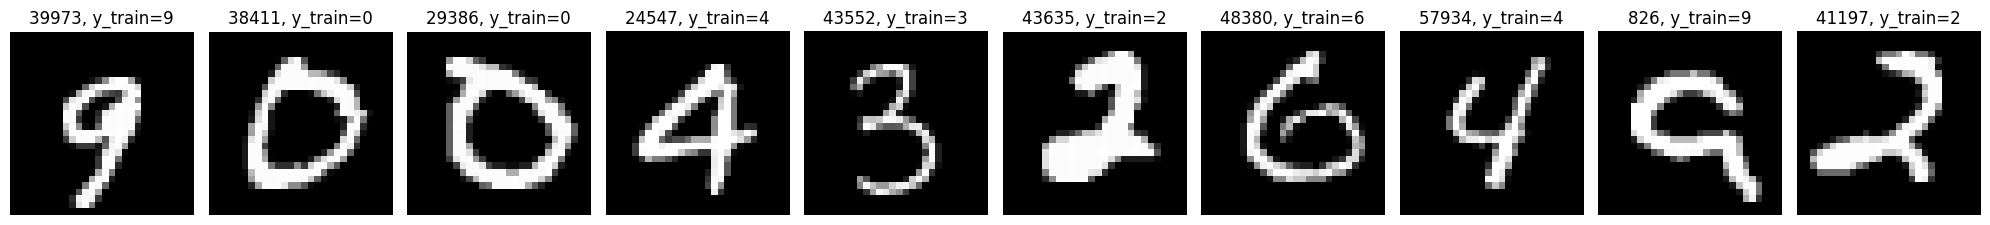

In [62]:
fig, axs = plt.subplots(1, 10, figsize=(20, 3))
for i, ax in zip(np.random.randint(0, 60000, 10), axs):
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(f'{i}, y_train={y_train[i]}')
    ax.axis("off")
plt.tight_layout()
plt.show()

In [63]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
])
model.summary()

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# predictons = model(x_train[:1]).numpy()
# print(predictons)
# print(tf.nn.softmax(predictons).numpy())

[[-0.39547977 -0.03507262 -0.47265288 -0.59879595 -0.37463543 -0.42854527
  -0.28448695 -0.09440736 -0.89477974 -0.7677078 ]]
[[0.10071459 0.14441597 0.09323448 0.08218513 0.10283595 0.09743888
  0.11253717 0.13609636 0.06112926 0.0694122 ]]


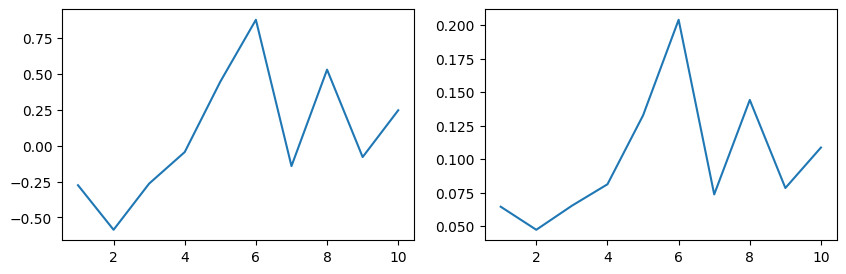

In [10]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 3))
# axs[0].plot([i+1 for i in range(len(predictons[0]))], predictons[0])
# axs[1].plot([i+1 for i in range(len(tf.nn.softmax(predictons).numpy()[0]))], tf.nn.softmax(predictons).numpy()[0])
# plt.show()

In [76]:
predictons = model(x_train[:1]).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictons).numpy()

2.32853

In [81]:
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

CSV_FILE_PATH = "tensorflow_test_01.csv"
callbacks = []
callbacks.append(tf.keras.callbacks.CSVLogger(CSV_FILE_PATH))

model.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=5,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9817 - loss: 0.0578 - val_accuracy: 0.9807 - val_loss: 0.0656
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9843 - loss: 0.0494 - val_accuracy: 0.9809 - val_loss: 0.0651
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9866 - loss: 0.0422 - val_accuracy: 0.9818 - val_loss: 0.0630
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9879 - loss: 0.0382 - val_accuracy: 0.9817 - val_loss: 0.0629
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9884 - loss: 0.0364 - val_accuracy: 0.9828 - val_loss: 0.0620


In [88]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9828 - loss: 0.0620


In [140]:
df = pd.read_csv(CSV_FILE_PATH)
df.head(3)

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.982167,0.057177,0.9807,0.065598
1,1,0.984767,0.049155,0.9809,0.065111
2,2,0.986267,0.043234,0.9818,0.062952


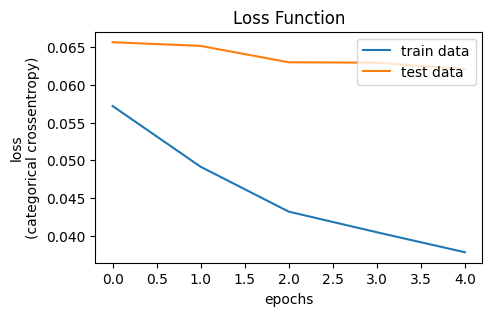

In [141]:
plt.figure(figsize=(5, 3))
plt.plot(df['epoch'], df['loss'], label="train data")
plt.plot(df['epoch'], df['val_loss'], label="test data")
plt.xlabel("epochs")
plt.ylabel("loss\n(categorical crossentropy)")
plt.title('Loss Function')
plt.legend(loc="upper right")
plt.show()

In [128]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
df = pd.DataFrame(probability_model(x_test))

In [138]:
df['prob'] = df.iloc[:, 0:9].idxmax(axis=1)
df['y_test'] = y_test
df.head(3)

,0,1,2,3,4,5,6,7,8,9,prob,y_test
0,8.913650e-10,2.644130e-09,5.804368e-08,9.873884e-06,5.095743e-12,2.417751e-09,1.001113e-13,9.999897e-01,2.203311e-09,1.990410e-07,7,7
1,2.238824e-11,2.789503e-05,9.999717e-01,3.782867e-07,8.798920e-20,2.201511e-09,2.338877e-11,9.335880e-17,8.409750e-10,1.260532e-18,2,2
2,2.118121e-07,9.992944e-01,3.748680e-05,2.059581e-06,2.491331e-05,8.125777e-07,1.019537e-06,5.303503e-04,1.081090e-04,6.057074e-07,1,1


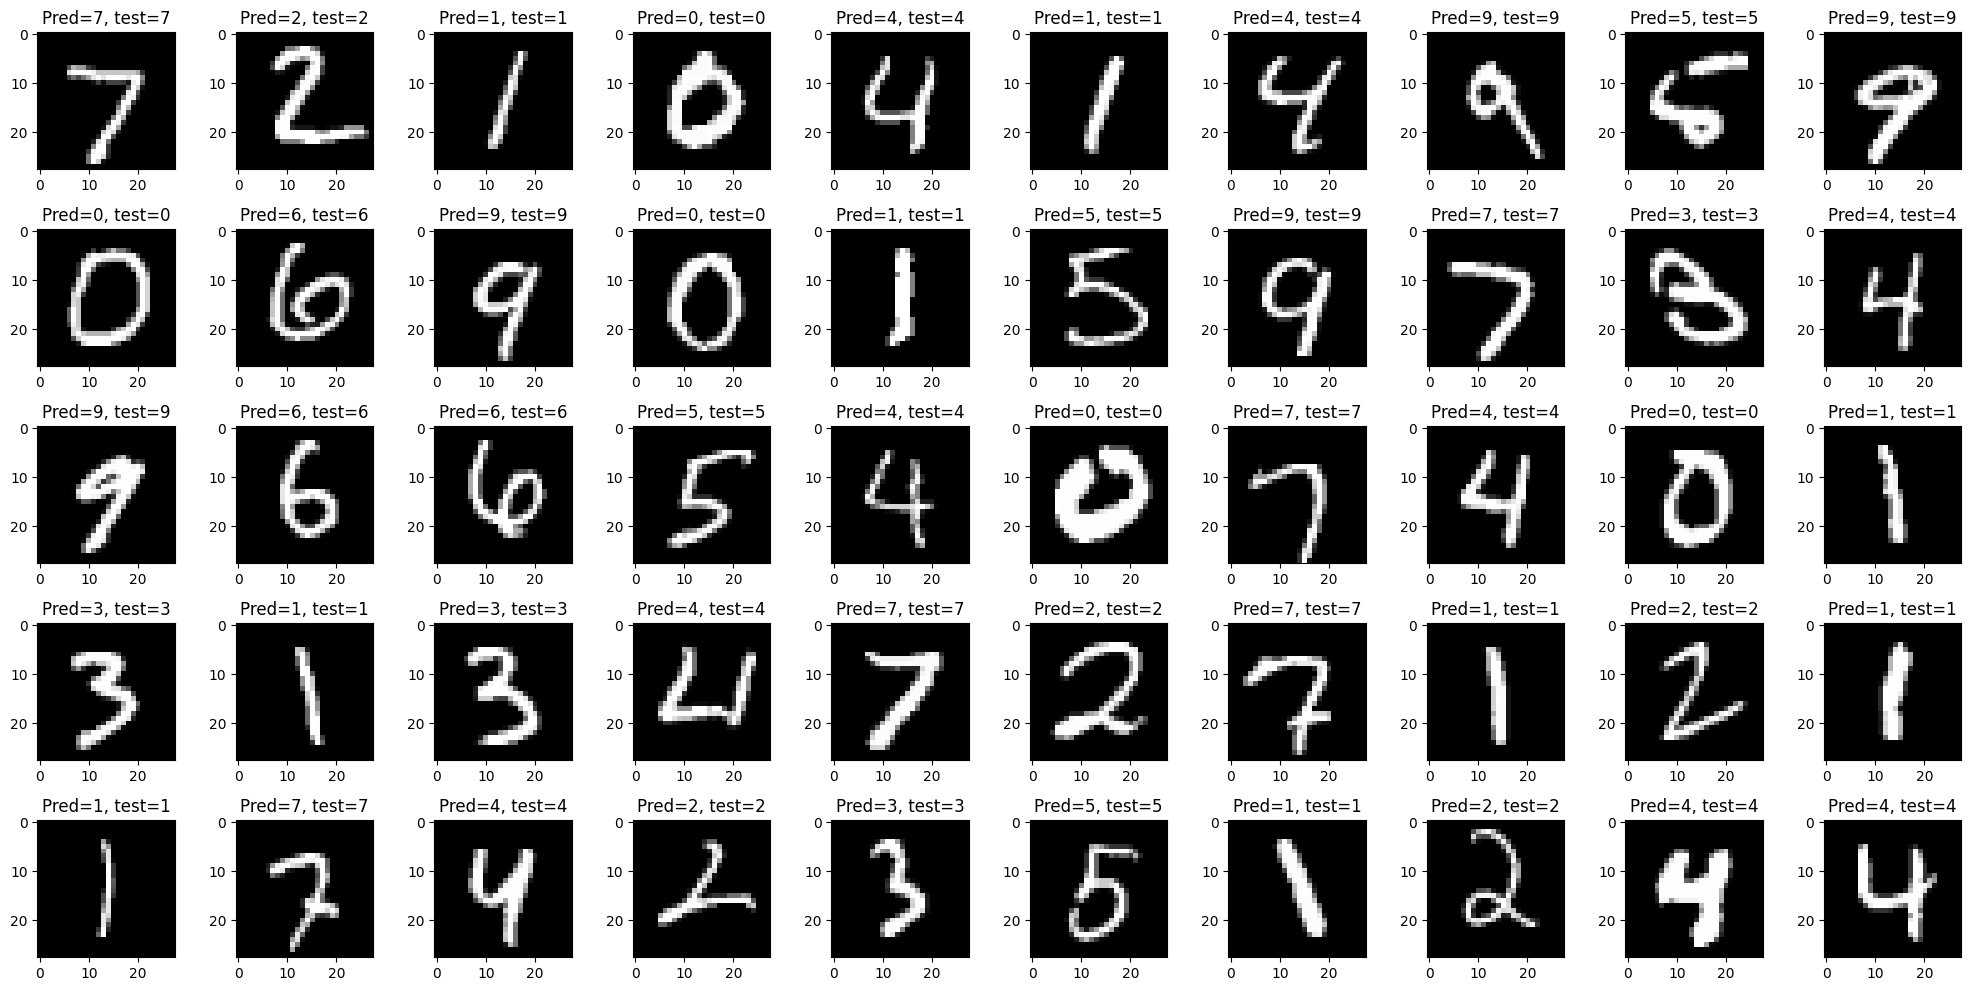

In [94]:
row, col = 5, 10
fig, axs = plt.subplots(row, col, figsize=(col*2, row*2))
num = 0
for i in range(row):
    for j in range(col):
        axs[i][j].imshow(x_test[num], cmap="gray")
        pred = df.iloc[num].idxmax()
        y_ = y_test[num]
        axs[i][j].set_title(f'Pred={pred}, test={y_}')
        if pred != y_:
            axs[i][j].set_title(f'Pred={pred}, test={y_}', color='r')
        num += 1
plt.tight_layout()
plt.show()

In [121]:
df[df['prob'] != df['y_test']]

,0,1,2,3,4,5,6,7,8,9,prob,y_test
149,3.007727e-06,7.300364e-04,2.511796e-01,0.058505,6.392015e-01,4.866128e-03,9.584744e-06,1.985516e-03,0.000016,4.350342e-02,4,2
247,3.365608e-08,3.989044e-07,7.407643e-01,0.000044,8.928237e-03,2.148510e-05,2.501705e-01,6.831311e-05,0.000003,2.291756e-11,2,4
321,1.803837e-09,1.228121e-05,9.770356e-04,0.000285,3.832573e-13,6.268296e-09,2.749392e-12,9.987218e-01,0.000003,4.166512e-07,7,2
340,3.615644e-10,7.193023e-06,3.198128e-08,0.612368,1.387535e-07,3.875983e-01,1.029122e-06,1.835551e-10,0.000005,2.037377e-05,3,5
381,1.767375e-07,4.180887e-05,9.264855e-05,0.315336,4.260732e-06,6.637316e-08,7.418963e-09,6.840721e-01,0.000009,4.435226e-04,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9768,6.595283e-01,7.111122e-06,2.863303e-01,0.000918,2.910558e-06,1.104461e-02,6.489936e-05,7.141041e-05,0.040533,1.499491e-03,0,2
9770,9.617031e-01,2.512943e-08,1.042574e-03,0.000366,5.929151e-04,1.956918e-02,1.669663e-02,1.299867e-05,0.000016,3.842058e-07,0,5
9792,4.928313e-07,1.364458e-03,1.161413e-06,0.000164,2.109028e-01,7.871147e-06,1.196630e-07,7.722723e-01,0.000124,1.516271e-02,7,4
9839,1.623676e-04,4.193879e-05,7.557110e-03,0.066825,1.470476e-11,7.480690e-03,2.419155e-06,9.080116e-01,0.006635,3.284141e-03,7,2
